In [1]:

import pandas as pd
import matplotlib.pylab as plt
import warnings
from spacepy import pycdf
from spacepy.time import Ticktock
import os
import numpy as np
import pandas as pd
from spacepy import pycdf
from spacepy.time import Ticktock
# 完全忽略PerformanceWarning
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

d:\anaconda3\envs\tensorflow\lib\site-packages\spacepy\time.py:2341: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  warnings.warn('Leapseconds may be out of date.'


In [26]:
#使用spacepy查看../RBSP/B_L4\rbspb_rel04_ect-mageis-l3_20120906_v8.2.0.cdf中的key
cdf = pycdf.CDF('../RB/rbsp-b-rbspice_lev-3-pap_tofxeh_20141229_v1.2.4-01.cdf')
print(cdf)
FPDU_Energy = cdf['FPDU_Energy'][...]
FPDU_Energy = np.round(FPDU_Energy, 3)
FPDU_EnergyRange = cdf['FPDU_EnergyRange'][...]
FPDU_Energy_Label = cdf['FPDU_Energy_Label'][...]
PA_Midpoint = cdf['PA_Midpoint'][...]
FPDU=cdf['FPDU'][...]
L=cdf['L'][...]
L_star=cdf['L_Star'][...]
print(FPDU_Energy)
print(PA_Midpoint)
print(FPDU)
print(L)
print(L_star)




Axis: CDF_INT1 [3] NRV
Bin: CDF_INT1 [17] NRV
Channel: CDF_INT1 [14] NRV
DDOY: CDF_DOUBLE [6781]
Duration: CDF_DOUBLE [6781]
ET: CDF_DOUBLE [6781]
Epoch: CDF_TIME_TT2000 [6781]
FPDU: CDF_DOUBLE [6781, 14, 17]
FPDU_Density: CDF_DOUBLE [6781]
FPDU_Energy: CDF_REAL4 [14] NRV
FPDU_EnergyRange: CDF_REAL4 [2, 14] NRV
FPDU_Energy_Label: CDF_CHAR*1 [14] NRV
FPDU_Error: CDF_REAL4 [6781, 14, 17]
FPDU_IntegralFlux: CDF_DOUBLE [6781]
FPDU_MaximFlux: CDF_DOUBLE [6781, 14]
FPDU_MinimFlux: CDF_DOUBLE [6781, 14]
FPDU_OmniFlux: CDF_DOUBLE [6781, 14]
FPDU_ParaPressure: CDF_DOUBLE [6781]
FPDU_PerpPressure: CDF_DOUBLE [6781]
FPDU_Quality: CDF_INT2 [6781, 14, 17]
FPDU_Weight: CDF_INT2 [6781, 14, 17]
I: CDF_REAL4 [6781]
L: CDF_REAL4 [6781]
L_Eq: CDF_REAL4 [6781]
L_Star: CDF_REAL4 [6781]
MLT: CDF_REAL4 [6781]
MidET: CDF_DOUBLE [6781]
MinMaxRange: CDF_INT1 [2] NRV
OrbitNumber: CDF_INT4 [6781]
PA_Midpoint: CDF_REAL4 [17] NRV
PA_Midpoint_Label: CDF_CHAR*1 [17] NRV
PA_Range: CDF_REAL4 [2, 17] NRV
Position: CDF_R

In [27]:


# def process_cdf_file(file_path):
#     with pycdf.CDF(file_path) as cdf:
#         if 'PA_Midpoint' not in cdf:
#             print(f"在文件 {file_path} 中未找到 'FPDU_ENERGY_LABL' 变量，跳过该文件。")
#             return pd.DataFrame()  # 返回空的 DataFrame
#         # 读取时间变量，并将其转换为 datetime 对象
#         epoch = cdf['Epoch'][...]
#         tt = Ticktock(epoch, 'CDFepoch')
#         datetime_array = np.array(tt.UTC)

#         # 读取能量标签
#         FPDU_ENERGY_LABL = cdf['FPDU_Energy'][...]  # 形状：[能量]
#         #将FPDU_ENERGY_LABL保留三位小数
#         FPDU_ENERGY_LABL = np.round(FPDU_ENERGY_LABL, 3)
#         FPDU_ENERGY_LABL = np.array(FPDU_ENERGY_LABL).astype(str)  # 转换为字符串数组
#         FPDU_ENERGY_LABL = FPDU_ENERGY_LABL.squeeze()
#         # 去除前后空格并转换为大写
#         FPDU_ENERGY_LABL_clean = np.char.strip(FPDU_ENERGY_LABL)
#         FPDU_ENERGY_LABL_upper = np.char.upper(FPDU_ENERGY_LABL_clean)
        

#         # 查找包含 'LOW/2' 的能量标签（不区分大小写）
#         # target_label = '114'############################################################################################################################################################################
#         # contains_target = np.char.find(FPDU_ENERGY_LABL_upper, target_label.upper()) >= 0
#         # energy_indices = np.where(contains_target)[0]
#         # print(energy_indices)

#         target_labels = ['0.269']
#         for target_label in target_labels:
#             contains_target = np.char.find(FPDU_ENERGY_LABL_upper, target_label.upper()) >= 0
#             energy_indices = np.where(contains_target)[0]
#             if len(energy_indices) > 0:
#                 energy_kev=0.269
#                 break

#         if len(energy_indices) == 0:
#             print(f"在文件 {file_path} 中未找到包含 '{target_label}' 的能量标签")
#             return pd.DataFrame()  # 返回空的 DataFrame 
#         else:
#             energy_index = energy_indices[0]  # 获取第一个匹配的索引

#         # 读取通量数据和相关变量
#         FPDU_corr = cdf['FPDU_OmniFlux'][...]  # 形状：[时间，俯仰角，能量]
#         I = cdf['I'][...]
#         L = cdf['L'][...]
#         Position = cdf['Position'][...]
#         MLT = cdf['MLT'][...]
#         FPDU_ERROR = cdf['FPDU_Error'][...]

#     # 获取数据的维度
    

#     # 提取并展开数据，以匹配总记录数
#     time_array = datetime_array
#     flux_array = FPDU_corr[:, energy_index]
 
   
#     I_array = I
#     L_array = L
  
#     MLT_array = MLT
#     # MLAT_array = MLAT[time_flat]
#     Position_array = Position
#     X_array = Position_array[:, 0]
#     Y_array = Position_array[:, 1]
#     Z_array = Position_array[:, 2]
#     Error = FPDU_ERROR[:, energy_index,1:5].sum(axis=1)

#     data = {
#         'Time': time_array,
#         'Flux': flux_array,
        
#         'I': I_array,
#         'L': L_array,
       
#         # 'L_star_PitchAngle': L_star_PitchAngle_array,
#         'MLT': MLT_array,
#         'X': X_array,
#         'Y': Y_array,
#         'Z': Z_array,
#         'Flux_Error': Error,
#         'energy_kev': energy_kev,
#     }

    
#     # 创建 DataFrame
#     df = pd.DataFrame(data)
#     df = df[df['L'] >= 2]
#     df = df[df['Flux'] >0]
#     # df = df[df['Flux_Error'] <95]
    
    
    
#     df = df.sample(frac=0.05, replace=False, random_state=1565)
#     return df


# folder_paths = [ '../RB']  # 请替换为您的文件夹路径
# # 存储所有 CDF 文件的路径
# cdf_files = []

# # 遍历所有文件夹，获取其中的 CDF 文件
# for folder_path in folder_paths:
#     cdf_files.extend([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.cdf')])
# print(len(cdf_files))
# df_list = []
# youxiao=0
# wuxiao=0
# for file_path in cdf_files:
#     print(f"Processing file: {file_path}")
#     df = process_cdf_file(file_path)
#     if not df.empty:
#         df_list.append(df)
#         youxiao+=1
#     else:
#         wuxiao+=1
#         print(f"跳过文件 {file_path}，因为不包含目标能量标签。")
# if df_list:
#     combined_df = pd.concat(df_list, ignore_index=True)
#     # 可选：查看拼接后的 DataFrame 的前几行
#     print(combined_df.head())
# else:
#     print("未找到包含目标能量标签的数据。")
# print(youxiao)
# print(wuxiao)



In [28]:
# #查看combined_df中有多少nan
# print(combined_df.isna().sum())
# import numpy as np  
# print(np.cos(np.pi))

In [29]:
# #查看PSD除去0以外的最小值
# print(combined_df[combined_df['Flux']>0]['Flux'].min())

# combined_df = combined_df.sort_values('Time')
# combined_df = combined_df.reset_index(drop=True)

In [30]:
# #查看combined_df['Flux']有多少个值为0
# print(combined_df[combined_df['Flux']==0].shape[0])
# print(combined_df[combined_df['Flux']!=0].shape[0])

In [31]:
# #查看df['Flux']的分布   
# plt.hist(np.log10(combined_df['Flux']+1), bins=100)

In [32]:
# #画横坐标为时间，纵坐标为L,颜色为log(Flux)的图,散点大小为5
# fig, ax = plt.subplots()
# sc = ax.scatter(combined_df['Time'][0:10000], combined_df['L'][0:10000], c=np.log10(combined_df['Flux'][0:10000]), cmap='jet',s=5)
# fig.colorbar(sc, ax=ax, label='log(Flux)')
# ax.set_xlabel('Time')

In [33]:
# from scipy import stats
# import pandas as pd 
# import matplotlib.pyplot as plt
# import numpy as np

# TQ=pd.read_csv('../空间天气参数/TQ.txt',sep='\s+',header=None)
# TQ.columns=['year','day','hour','BXGSM','BYGSM','BZGSM','TEMP','DEN','PDYN','Kp','Dst','F107','AE','AL','AU']
# TQ['datetime'] = pd.to_datetime(TQ['year'].astype(str) + TQ['day'].astype(str).str.zfill(3) + TQ['hour'].astype(str).str.zfill(2), format='%Y%j%H')
# TQ=TQ.drop(['year','day','hour'],axis=1)
# TQ = TQ.sort_values(by='datetime')
# TQ.set_index('datetime', inplace=True)

# #删除TQ中的BXGSM列
# TQ=TQ.drop(['BXGSM'],axis=1)
# TQ=TQ.drop(['BYGSM'],axis=1)
# TQ=TQ.drop(['DEN'],axis=1)

# print(TQ)

# z_scores = np.abs(stats.zscore(TQ['BZGSM']))
# threshold = 3  # 设置Z-score阈值
# TQ['BZGSM_IS1'] = np.where(z_scores >= threshold, 0, 1)
# TQ['BZGSM_no_outliers'] = TQ['BZGSM'].where(z_scores < threshold, np.nan)  # 将异常值替换为NaN

# # 在原位置插值
# TQ['BZGSM'] = TQ['BZGSM_no_outliers'].interpolate(method='time')
# # 删除临时列
# TQ = TQ.drop(columns=['BZGSM_no_outliers'])
# plt.plot(TQ.index, TQ['BZGSM'])

# z_scores = np.abs(stats.zscore(TQ['TEMP']))
# threshold = 3  # 设置Z-score阈值
# TQ['TEMP_IS1'] = np.where(z_scores >= threshold, 0, 1)
# TQ['TEMP_no_outliers'] = TQ['TEMP'].where(z_scores < threshold, np.nan)  # 将异常值替换为NaN

# # 在原位置插值
# TQ['TEMP'] = TQ['TEMP_no_outliers'].interpolate(method='time')
# # 删除临时列
# TQ = TQ.drop(columns=['TEMP_no_outliers'])
# plt.plot(TQ.index, TQ['TEMP'])


# z_scores = np.abs(stats.zscore(TQ['PDYN']))
# threshold = 3  # 设置Z-score阈值
# TQ['PDYN_IS1'] = np.where(z_scores >= threshold, 0, 1)
# TQ['PDYN_no_outliers'] = TQ['PDYN'].where(z_scores < threshold, np.nan)  # 将异常值替换为NaN

# # 在原位置插值
# TQ['PDYN'] = TQ['PDYN_no_outliers'].interpolate(method='time')
# # 删除临时列
# TQ = TQ.drop(columns=['PDYN_no_outliers'])
# plt.plot(TQ.index, TQ['PDYN'])

# z_scores = np.abs(stats.zscore(TQ['F107']))
# threshold = 3  # 设置Z-score阈值
# TQ['F107_IS1'] = np.where(z_scores >= threshold, 0, 1)
# TQ['F107_no_outliers'] = TQ['F107'].where(z_scores < threshold, np.nan)  # 将异常值替换为NaN

# # 在原位置插值
# TQ['F107'] = TQ['F107_no_outliers'].interpolate(method='time')
# # 删除临时列
# TQ = TQ.drop(columns=['F107_no_outliers'])
# plt.plot(TQ.index, TQ['F107'])

# V_H_5=pd.read_csv('../空间天气参数/V_H_5.txt',sep='\s+',header=None)
# V_H_5.columns=['year','day','hour','min','VX', 'VY', 'VZ', 'SYMH']
# year_str = V_H_5['year'].astype(str)
# day_str = V_H_5['day'].astype(str).str.zfill(3)
# hour_str = V_H_5['hour'].astype(str).str.zfill(2)
# min_str = V_H_5['min'].astype(str).str.zfill(2)

# # 合并字符串
# datetime_str = year_str + day_str + hour_str + min_str

# # 转换为 datetime 对象
# V_H_5['datetime'] = pd.to_datetime(datetime_str, format='%Y%j%H%M')
# V_H_5=V_H_5.drop(['year','day','hour','min'],axis=1)
# V_H_5 = V_H_5.sort_values(by='datetime')
# V_H_5.set_index('datetime', inplace=True)

# V_H_5=V_H_5.drop(['VY'],axis=1)
# V_H_5=V_H_5.drop(['VZ'],axis=1)
# print(V_H_5)



# z_scores = np.abs(stats.zscore(V_H_5['VX']))
# threshold = 3  # 设置Z-score阈值
# V_H_5['VX_IS1'] = np.where(z_scores >= threshold, 0, 1)
# V_H_5['VX_no_outliers'] = V_H_5['VX'].where(z_scores < threshold, np.nan)  # 将异常值替换为NaN
# # 在原位置插值
# V_H_5['VX'] = V_H_5['VX_no_outliers'].interpolate(method='time')
# # 删除临时列
# V_H_5 = V_H_5.drop(columns=['VX_no_outliers'])

# plt.plot(V_H_5.index, V_H_5['SYMH'])

# #将V_H_5修改为1h的频率
# V_H_5=V_H_5.resample('1H').mean()
# print(V_H_5)

# combined_df['Time'] = pd.to_datetime(combined_df['Time'])
# combined_df = combined_df.sort_values('Time')

# combined_df = combined_df.reset_index(drop=True)

# TQ = TQ.reset_index()
# print(TQ)

# V_H_5 = V_H_5.reset_index()
# print(V_H_5)

In [34]:
# combined_df['datetime_hour'] = combined_df['Time'].dt.floor('H')

# # 保存原始列名（确保每次循环从原始列开始）
# original_TQ_columns = TQ.columns.tolist()
# original_V_H_5_columns = V_H_5.columns.tolist()

# for i in range(1, 151):
#     combined_df[f'datetime_minus_h'] = combined_df['datetime_hour'] - pd.Timedelta(hours=i)
    
#     # 每次循环使用原始列名创建临时副本（避免污染原始数据）
#     temp_TQ = TQ.rename(columns={col: f"{col}_{i}h" for col in original_TQ_columns if col != 'datetime'})
#     temp_V_H_5 = V_H_5.rename(columns={col: f"{col}_{i}h" for col in original_V_H_5_columns if col != 'datetime'})
    
#     # 合并临时副本
#     combined_df = combined_df.merge(
#         temp_TQ,
#         left_on=f'datetime_minus_h',
#         right_on='datetime',
#         how='left'
#     ).drop(columns=['datetime'])
    
#     combined_df = combined_df.merge(
#         temp_V_H_5,
#         left_on=f'datetime_minus_h',
#         right_on='datetime',
#         how='left'
#     ).drop(columns=['datetime'])
#     print(f"Processed {i} hours")

# combined_df.head()

In [35]:
# combined_df.to_hdf('combined_df_test.h5', key='df', mode='w')

In [2]:

combined_df=pd.read_hdf('combined_df_test.h5', key='df')
#随机抽取10%的数据
#combined_df = combined_df.sample(frac=0.5, replace=False, random_state=1565)


In [ ]:
#筛选出combined_df['Dst_0h']<-40的数据,以及combined_df['L']位于3-4之间的数据，以及combined_df['MLT']属于0-6之间的数据
combined_df1 = combined_df[combined_df['Dst_1h']<-50]
combined_df1 = combined_df1[combined_df1['L']>=3.5]
combined_df1 = combined_df1[combined_df1['L']<=4.5]
combined_df1 = combined_df1[combined_df1['MLT']>=0]
combined_df1 = combined_df1[combined_df1['MLT']<=6]
print(combined_df1.shape[0])
# print(combined_df1['Flux'])的平均值
print(combined_df1['Flux'].mean())

557
10770326.922998227


In [ ]:
#筛选出combined_df['Dst_0h']<-40的数据,以及combined_df['L']位于3-4之间的数据，以及combined_df['MLT']属于0-6之间的数据
combined_df1 = combined_df[combined_df['Dst_1h']<-50]
combined_df1 = combined_df1[combined_df1['L']>=3.5]
combined_df1 = combined_df1[combined_df1['L']<=4.5]
combined_df1 = combined_df1[combined_df1['MLT']>=6]
combined_df1 = combined_df1[combined_df1['MLT']<=12]
print(combined_df1.shape[0])
# print(combined_df1['Flux'])的平均值
print(combined_df1['Flux'].mean())

589
12591325.16126737


In [ ]:
#筛选出combined_df['Dst_0h']<-40的数据,以及combined_df['L']位于3-4之间的数据，以及combined_df['MLT']属于0-6之间的数据
combined_df1 = combined_df[combined_df['Dst_1h']<-50]
combined_df1 = combined_df1[combined_df1['L']>=3.5]
combined_df1 = combined_df1[combined_df1['L']<=4.5]
combined_df1 = combined_df1[combined_df1['MLT']>=12]
combined_df1 = combined_df1[combined_df1['MLT']<=18]
print(combined_df1.shape[0])
# print(combined_df1['Flux'])的平均值
print(combined_df1['Flux'].mean())

1062
14333574.420673044


In [ ]:
#筛选出combined_df['Dst_0h']<-40的数据,以及combined_df['L']位于3-4之间的数据，以及combined_df['MLT']属于0-6之间的数据
combined_df1 = combined_df[combined_df['Dst_1h']<-50]
combined_df1 = combined_df1[combined_df1['L']>=3.5]
combined_df1 = combined_df1[combined_df1['L']<=4.5]
combined_df1 = combined_df1[combined_df1['MLT']>=18]
combined_df1 = combined_df1[combined_df1['MLT']<=24]
print(combined_df1.shape[0])
# print(combined_df1['Flux'])的平均值
print(combined_df1['Flux'].mean())

1135
13405846.379374634


In [ ]:
#筛选出combined_df['Dst_0h']<-40的数据,以及combined_df['L']位于3-4之间的数据，以及combined_df['MLT']属于0-6之间的数据
combined_df1 = combined_df[combined_df['Dst_1h']>0]
combined_df1 = combined_df1[combined_df1['L']>=3.5]
combined_df1 = combined_df1[combined_df1['L']<=4.5]
combined_df1 = combined_df1[combined_df1['MLT']>=0]
combined_df1 = combined_df1[combined_df1['MLT']<=6]
print(combined_df1.shape[0])
# print(combined_df1['Flux'])的平均值
print(combined_df1['Flux'].mean())

7709
10630056.053918425


In [ ]:
#筛选出combined_df['Dst_0h']<-40的数据,以及combined_df['L']位于3-4之间的数据，以及combined_df['MLT']属于0-6之间的数据
combined_df1 = combined_df[combined_df['Dst_1h']>0]
combined_df1 = combined_df1[combined_df1['L']>=3.5]
combined_df1 = combined_df1[combined_df1['L']<=4.5]
combined_df1 = combined_df1[combined_df1['MLT']>=6]
combined_df1 = combined_df1[combined_df1['MLT']<=12]
print(combined_df1.shape[0])
# print(combined_df1['Flux'])的平均值
print(combined_df1['Flux'].mean())

6549
11138816.184475735


In [ ]:
#筛选出combined_df['Dst_0h']<-40的数据,以及combined_df['L']位于3-4之间的数据，以及combined_df['MLT']属于0-6之间的数据
combined_df1 = combined_df[combined_df['Dst_1h']>0]
combined_df1 = combined_df1[combined_df1['L']>=3.5]
combined_df1 = combined_df1[combined_df1['L']<=4.5]
combined_df1 = combined_df1[combined_df1['MLT']>=12]
combined_df1 = combined_df1[combined_df1['MLT']<=18]
print(combined_df1.shape[0])
# print(combined_df1['Flux'])的平均值
print(combined_df1['Flux'].mean())

3917
15862463.698245054


In [ ]:
#筛选出combined_df['Dst_0h']<-40的数据,以及combined_df['L']位于3-4之间的数据，以及combined_df['MLT']属于0-6之间的数据
combined_df1 = combined_df[combined_df['Dst_1h']>0]
combined_df1 = combined_df1[combined_df1['L']>=3.5]
combined_df1 = combined_df1[combined_df1['L']<=4.5]
combined_df1 = combined_df1[combined_df1['MLT']>=18]
combined_df1 = combined_df1[combined_df1['MLT']<=24]
print(combined_df1.shape[0])
# print(combined_df1['Flux'])的平均值
print(combined_df1['Flux'].mean())

5459
15363133.283523483


In [ ]:
#筛选出combined_df['Dst_0h']<-40的数据,以及combined_df['L']位于3-4之间的数据，以及combined_df['MLT']属于0-6之间的数据
combined_df1 = combined_df[combined_df['Dst_60h']<0]
combined_df1 = combined_df1[combined_df1['L']>=3.5]
combined_df1 = combined_df1[combined_df1['L']<=4.5]
combined_df1 = combined_df1[combined_df1['MLT']>=0]
combined_df1 = combined_df1[combined_df1['MLT']<=6]
print(combined_df1.shape[0])
# print(combined_df1['Flux'])的平均值
print(combined_df1['Flux'].mean())

22682
13632922.244879654


In [ ]:
#筛选出combined_df['Dst_0h']<-40的数据,以及combined_df['L']位于3-4之间的数据，以及combined_df['MLT']属于0-6之间的数据
combined_df1 = combined_df[combined_df['Dst_60h']<0]
combined_df1 = combined_df1[combined_df1['L']>=3.5]
combined_df1 = combined_df1[combined_df1['L']<=4.5]
combined_df1 = combined_df1[combined_df1['MLT']>=6]
combined_df1 = combined_df1[combined_df1['MLT']<=12]
print(combined_df1.shape[0])
# print(combined_df1['Flux'])的平均值
print(combined_df1['Flux'].mean())

19094
14504066.076656826


In [ ]:
#筛选出combined_df['Dst_0h']<-40的数据,以及combined_df['L']位于3-4之间的数据，以及combined_df['MLT']属于0-6之间的数据
combined_df1 = combined_df[combined_df['Dst_60h']<0]
combined_df1 = combined_df1[combined_df1['L']>=3.5]
combined_df1 = combined_df1[combined_df1['L']<=4.5]
combined_df1 = combined_df1[combined_df1['MLT']>=12]
combined_df1 = combined_df1[combined_df1['MLT']<=18]
print(combined_df1.shape[0])
# print(combined_df1['Flux'])的平均值
print(combined_df1['Flux'].mean())

19087
17513218.897274274


In [ ]:
#筛选出combined_df['Dst_0h']<-40的数据,以及combined_df['L']位于3-4之间的数据，以及combined_df['MLT']属于0-6之间的数据
combined_df1 = combined_df[combined_df['Dst_60h']<0]
combined_df1 = combined_df1[combined_df1['L']>=3.5]
combined_df1 = combined_df1[combined_df1['L']<=4.5]
combined_df1 = combined_df1[combined_df1['MLT']>=18]
combined_df1 = combined_df1[combined_df1['MLT']<=24]
print(combined_df1.shape[0])
# print(combined_df1['Flux'])的平均值
print(combined_df1['Flux'].mean())

24201
16285207.356978904


Text(0.5, 0, 'Time')

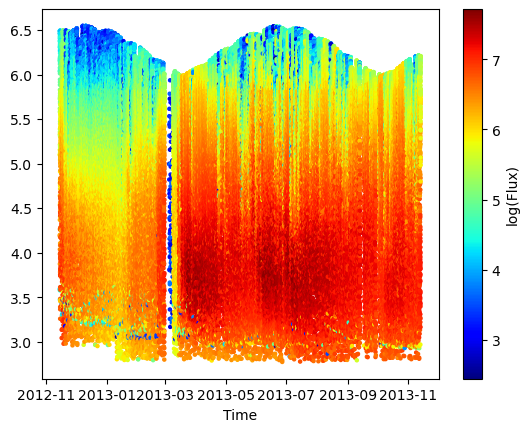

In [ ]:
#画横坐标为时间，纵坐标为L,颜色为log(Flux)的图,散点大小为5
fig, ax = plt.subplots()
sc = ax.scatter(combined_df['Time'][0:100000], combined_df['L'][0:100000], c=np.log10(combined_df['Flux'][0:100000]), cmap='jet',s=5)
fig.colorbar(sc, ax=ax, label='log(Flux)')
ax.set_xlabel('Time')

In [ ]:
print(combined_df['Flux_Error'][0:100])

0     400.000000
1     400.000000
2     400.000000
3     400.000000
4     148.891678
         ...    
95    350.000000
96    182.517807
97    320.710693
98    239.384689
99    276.776703
Name: Flux_Error, Length: 100, dtype: float32


In [ ]:
#计算combined_df['Flux_Error']==100的数量
print(combined_df[combined_df['Flux_Error']==100].shape[0])

0


In [ ]:
#计算combined_df['PSD']与combined_df['Kp_1h']的相关性
print(combined_df['Flux'].corr(combined_df['L']))

-0.5376994632558738


In [ ]:
print(combined_df['Flux'].corr(combined_df['Kp_10h']))

0.003773474962514174


In [3]:
#将combined_df按Time排序
combined_df = combined_df.sort_values('Time')

In [ ]:
print(combined_df)

                          Time          Flux    I         L        MLT  \
0      2012-11-14 19:03:53.482  4.149765e+04  3.0  3.471790   2.149820   
1      2012-11-14 19:07:10.314  2.997178e+04  3.0  3.577046   2.262145   
2      2012-11-14 19:07:32.186  1.842283e+04  3.0  3.588590   2.274214   
3      2012-11-14 19:07:43.121  2.710266e+04  3.0  3.594352   2.280249   
4      2012-11-14 19:16:49.942  2.973719e+06  3.0  3.872966   2.560294   
...                        ...           ...  ...       ...        ...   
642554 2018-12-27 23:40:04.053  3.270975e+06  3.0  5.150360  16.776421   
642555 2018-12-27 23:50:21.187  2.414862e+06  1.0  5.340595  16.943249   
642556 2018-12-27 23:51:46.304  2.193304e+06  1.0  5.365459  16.965469   
642557 2018-12-27 23:53:53.986  2.072388e+06  1.0  5.402144  16.998474   
642558 2018-12-27 23:56:44.229  1.868759e+06  1.0  5.449921  17.041880   

               X         Y         Z  Flux_Error  energy_kev  ... AE_150h  \
0      -0.797881  3.176643 -0.1692

In [ ]:
print(combined_df.columns)

Index(['Time', 'Flux', 'I', 'L', 'MLT', 'X', 'Y', 'Z', 'Flux_Error',
       'energy_kev',
       ...
       'AE_150h', 'AL_150h', 'AU_150h', 'BZGSM_IS1_150h', 'TEMP_IS1_150h',
       'PDYN_IS1_150h', 'F107_IS1_150h', 'VX_150h', 'SYMH_150h',
       'VX_IS1_150h'],
      dtype='object', length=2412)


In [ ]:
print(combined_df['Kp_1h'])

0          7
1          7
2          7
3          7
4          7
          ..
642554    23
642555    23
642556    23
642557    23
642558    23
Name: Kp_1h, Length: 642559, dtype: int64


In [ ]:
plt.figure(figsize=(12, 6))


plt.show()

<Figure size 1200x600 with 0 Axes>

In [ ]:
#查看combined_df['Flux']除去0以外的最小值
print(combined_df[combined_df['Flux']!=0]['Flux'].min())
print(combined_df[combined_df['Flux']!=0]['Flux'].max())

281.6088933783492
114758352.266614


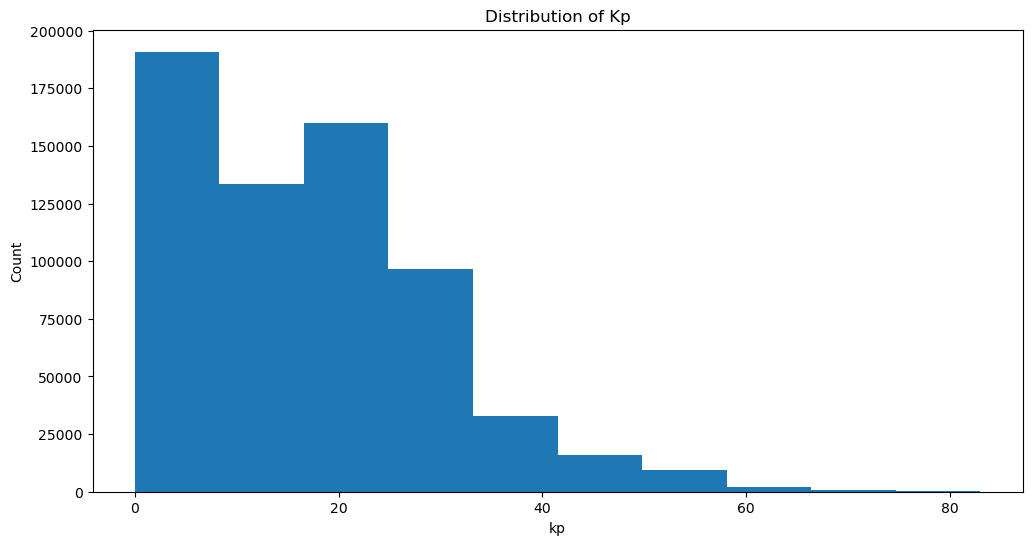

In [ ]:
#画出df_with_kp['kp']分布
plt.figure(figsize=(12, 6))
plt.hist(combined_df['Kp_2h'])
plt.xlabel('kp')
plt.ylabel('Count')
plt.title('Distribution of Kp')
plt.show()

In [ ]:
#检查是否有缺失值
print(combined_df.isnull().sum().tolist())


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(combined_df.shape)

(642559, 2412)


In [ ]:
print(combined_df.isnull().sum().tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(combined_df)

                          Time          Flux    I         L        MLT  \
0      2012-11-14 19:03:53.482  4.149765e+04  3.0  3.471790   2.149820   
1      2012-11-14 19:07:10.314  2.997178e+04  3.0  3.577046   2.262145   
2      2012-11-14 19:07:32.186  1.842283e+04  3.0  3.588590   2.274214   
3      2012-11-14 19:07:43.121  2.710266e+04  3.0  3.594352   2.280249   
4      2012-11-14 19:16:49.942  2.973719e+06  3.0  3.872966   2.560294   
...                        ...           ...  ...       ...        ...   
642554 2018-12-27 23:40:04.053  3.270975e+06  3.0  5.150360  16.776421   
642555 2018-12-27 23:50:21.187  2.414862e+06  1.0  5.340595  16.943249   
642556 2018-12-27 23:51:46.304  2.193304e+06  1.0  5.365459  16.965469   
642557 2018-12-27 23:53:53.986  2.072388e+06  1.0  5.402144  16.998474   
642558 2018-12-27 23:56:44.229  1.868759e+06  1.0  5.449921  17.041880   

               X         Y         Z  Flux_Error  energy_kev  ... AE_150h  \
0      -0.797881  3.176643 -0.1692

In [4]:
columns_list = combined_df.columns.tolist()
print(columns_list)


['Time', 'Flux', 'I', 'L', 'MLT', 'X', 'Y', 'Z', 'Flux_Error', 'energy_kev', 'datetime_hour', 'datetime_minus_h', 'BZGSM_1h', 'TEMP_1h', 'PDYN_1h', 'Kp_1h', 'Dst_1h', 'F107_1h', 'AE_1h', 'AL_1h', 'AU_1h', 'BZGSM_IS1_1h', 'TEMP_IS1_1h', 'PDYN_IS1_1h', 'F107_IS1_1h', 'VX_1h', 'SYMH_1h', 'VX_IS1_1h', 'BZGSM_2h', 'TEMP_2h', 'PDYN_2h', 'Kp_2h', 'Dst_2h', 'F107_2h', 'AE_2h', 'AL_2h', 'AU_2h', 'BZGSM_IS1_2h', 'TEMP_IS1_2h', 'PDYN_IS1_2h', 'F107_IS1_2h', 'VX_2h', 'SYMH_2h', 'VX_IS1_2h', 'BZGSM_3h', 'TEMP_3h', 'PDYN_3h', 'Kp_3h', 'Dst_3h', 'F107_3h', 'AE_3h', 'AL_3h', 'AU_3h', 'BZGSM_IS1_3h', 'TEMP_IS1_3h', 'PDYN_IS1_3h', 'F107_IS1_3h', 'VX_3h', 'SYMH_3h', 'VX_IS1_3h', 'BZGSM_4h', 'TEMP_4h', 'PDYN_4h', 'Kp_4h', 'Dst_4h', 'F107_4h', 'AE_4h', 'AL_4h', 'AU_4h', 'BZGSM_IS1_4h', 'TEMP_IS1_4h', 'PDYN_IS1_4h', 'F107_IS1_4h', 'VX_4h', 'SYMH_4h', 'VX_IS1_4h', 'BZGSM_5h', 'TEMP_5h', 'PDYN_5h', 'Kp_5h', 'Dst_5h', 'F107_5h', 'AE_5h', 'AL_5h', 'AU_5h', 'BZGSM_IS1_5h', 'TEMP_IS1_5h', 'PDYN_IS1_5h', 'F107_IS1

In [5]:
#将combined_df随机打乱
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
print(combined_df)

                          Time          Flux          I         L        MLT  \
0      2014-05-05 10:45:40.932  8.265760e+06   3.000000  4.155222  11.931677   
1      2012-11-29 04:57:57.453  6.698678e+04   1.000000  5.808748   4.613020   
2      2015-07-13 17:44:56.247  7.244646e+05  12.198584  5.699795  16.831556   
3      2018-07-05 05:31:39.681  5.424802e+06   1.000000  4.801782  23.554913   
4      2018-11-16 17:26:27.961  1.525622e+07   3.000000  3.430435  23.829010   
...                        ...           ...        ...       ...        ...   
642554 2013-09-01 02:10:38.457  1.250160e+07   3.000000  3.136676  22.240812   
642555 2017-03-17 21:28:48.639  1.518631e+06   1.000000  5.585708  19.497272   
642556 2015-04-07 19:34:52.095  4.495365e+06   1.000000  4.931977  22.876886   
642557 2018-05-15 04:21:11.817  3.515846e+06   3.000000  2.890690   7.344424   
642558 2018-07-04 14:22:02.632  9.969951e+05   1.000000  6.056028   1.760131   

               X         Y         Z  F

In [6]:
time_steps=100
VX_time1 = [f'VX_{i}h' for i in range(1, time_steps + 1)]
SYMH_time2 = [f'SYMH_{i}h' for i in range(1, time_steps + 1)]
VX_IS1_time3 = [f'VX_IS1_{i}h' for i in range(1, time_steps + 1)]
BZGSM_time4 = [f'BZGSM_{i}h' for i in range(1, time_steps + 1)]
TEMP_time5 = [f'TEMP_{i}h' for i in range(1, time_steps + 1)]
PDYN_time6 = [f'PDYN_{i}h' for i in range(1, time_steps + 1)]
Kp_time7 = [f'Kp_{i}h' for i in range(1, time_steps + 1)]
Dst_time8 = [f'Dst_{i}h' for i in range(1, time_steps + 1)]
F107_time9 = [f'F107_{i}h' for i in range(1, time_steps + 1)]
AE_time10 = [f'AE_{i}h' for i in range(1, time_steps + 1)]
AL_time11 = [f'AL_{i}h' for i in range(1, time_steps + 1)]
AU_time12 = [f'AU_{i}h' for i in range(1, time_steps + 1)]
BZGSM_IS1_time13 = [f'BZGSM_IS1_{i}h' for i in range(1, time_steps + 1)]
TEMP_IS1_time14 = [f'TEMP_IS1_{i}h' for i in range(1, time_steps + 1)]
PDYN_IS1_time15 = [f'PDYN_IS1_{i}h' for i in range(1, time_steps + 1)]
F107_IS1_time16 = [f'F107_IS1_{i}h' for i in range(1, time_steps + 1)]


In [ ]:
print(VX_time1)

['VX_1h', 'VX_2h', 'VX_3h', 'VX_4h', 'VX_5h', 'VX_6h', 'VX_7h', 'VX_8h', 'VX_9h', 'VX_10h', 'VX_11h', 'VX_12h', 'VX_13h', 'VX_14h', 'VX_15h', 'VX_16h', 'VX_17h', 'VX_18h', 'VX_19h', 'VX_20h', 'VX_21h', 'VX_22h', 'VX_23h', 'VX_24h', 'VX_25h', 'VX_26h', 'VX_27h', 'VX_28h', 'VX_29h', 'VX_30h', 'VX_31h', 'VX_32h', 'VX_33h', 'VX_34h', 'VX_35h', 'VX_36h', 'VX_37h', 'VX_38h', 'VX_39h', 'VX_40h', 'VX_41h', 'VX_42h', 'VX_43h', 'VX_44h', 'VX_45h', 'VX_46h', 'VX_47h', 'VX_48h', 'VX_49h', 'VX_50h', 'VX_51h', 'VX_52h', 'VX_53h', 'VX_54h', 'VX_55h', 'VX_56h', 'VX_57h', 'VX_58h', 'VX_59h', 'VX_60h', 'VX_61h', 'VX_62h', 'VX_63h', 'VX_64h', 'VX_65h', 'VX_66h', 'VX_67h', 'VX_68h', 'VX_69h', 'VX_70h', 'VX_71h', 'VX_72h', 'VX_73h', 'VX_74h', 'VX_75h', 'VX_76h', 'VX_77h', 'VX_78h', 'VX_79h', 'VX_80h', 'VX_81h', 'VX_82h', 'VX_83h', 'VX_84h', 'VX_85h', 'VX_86h', 'VX_87h', 'VX_88h', 'VX_89h', 'VX_90h', 'VX_91h', 'VX_92h', 'VX_93h', 'VX_94h', 'VX_95h', 'VX_96h', 'VX_97h', 'VX_98h', 'VX_99h', 'VX_100h', 'VX_101

In [ ]:
X_time1 = combined_df[VX_time1].values  
X_time2 = combined_df[SYMH_time2].values 
X_time3 = combined_df[VX_IS1_time3].values
X_time4 = combined_df[BZGSM_time4].values
X_time5 = combined_df[TEMP_time5].values
X_time6 = combined_df[PDYN_time6].values
X_time7 = combined_df[Kp_time7].values
X_time8 = combined_df[Dst_time8].values
X_time9 = combined_df[F107_time9].values
X_time10 = combined_df[AE_time10].values
X_time11 = combined_df[AL_time11].values
X_time12 = combined_df[AU_time12].values
X_time13 = combined_df[BZGSM_IS1_time13].values
X_time14 = combined_df[TEMP_IS1_time14].values
X_time15 = combined_df[PDYN_IS1_time15].values
X_time16 = combined_df[F107_IS1_time16].values


X_time = np.stack((X_time1, X_time2,X_time3,X_time4,X_time5,X_time6,X_time7,X_time8,X_time9,X_time10,X_time11,X_time12,X_time13,X_time14,X_time15,X_time16), axis=2)
print(X_time.shape)
# 定义非时间序列特征列
non_time_features = [ 'I', 'MLT', 'L']

# 提取非时间序列数据
X_non_time = combined_df[non_time_features].values  # 形状 (num_samples, 3)
y=np.log10(combined_df['Flux'].values) # 形状 (num_samples,)

# 如果是二分类任务，将其转换为二维数组
y = y.reshape(-1, 1)  # 形状 (num_samples, 1)
flux_error = combined_df['Flux_Error'].values.reshape(-1, 1)

(642559, 100, 12)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
scaler_time = MinMaxScaler()
num_samples = X_time.shape[0]
time_steps = 120  # 根据您的数据调整
num_features = 16  # 您有16个时间序列特征
X_time_reshaped = X_time.reshape(-1, num_features)  # (num_samples * time_steps, 16)

In [ ]:

X_time_scaled = scaler_time.fit_transform(X_time_reshaped)
X_time = X_time_scaled.reshape(num_samples, time_steps, num_features)
scaler_non_time = StandardScaler()
X_non_time = scaler_non_time.fit_transform(X_non_time)
scaler_target = MinMaxScaler()
y_scaled = scaler_target.fit_transform(y)


import joblib
joblib.dump(scaler_time, 'scaler_time.pkl')
joblib.dump(scaler_non_time, 'scaler_non_time.pkl')
joblib.dump(scaler_target, 'scaler_target.pkl')

scaler_flux = MinMaxScaler()
flux_error_scaled = scaler_flux.fit_transform(flux_error)  # 缩放到 [0, 1]

# 反转权重（假设较高的 Flux_Error 表示较低的质量）
flux_error_reversed = 1 - flux_error_scaled 
min_weight = 0.1
flux_error_final = flux_error_reversed * (1 - min_weight) + min_weight  # 缩放到 [min_weight, 1]

In [ ]:

X_time_train, X_time_val, X_non_time_train, X_non_time_val, y_train, y_val, weight_train, weight_val = train_test_split(
    X_time, X_non_time, y_scaled, flux_error_final, test_size=0.2, random_state=42
)

In [ ]:



time_series_input = Input(shape=(time_steps, num_features), name='time_series_input')
lstm_out = LSTM(64, activation='tanh')(time_series_input)
print(lstm_out.shape)

# 非时间序列输入：3个特征
non_time_series_input = Input(shape=(X_non_time_train.shape[1],), name='non_time_series_input')

# 拼接 LSTM 输出和非时间序列输入
concatenated = Concatenate()([lstm_out, non_time_series_input])

# 全连接层
dense1 = Dense(64, activation='sigmoid')(concatenated)
dense2 = Dense(32, activation='sigmoid')(dense1)
output = Dense(1, activation='linear')(dense2)  # 根据任务调整输出层

# 构建模型
model = Model(inputs=[time_series_input, non_time_series_input], outputs=output)

# from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.001, clipvalue=1.0)

# 编译模型
model.compile(optimizer='adam',
              loss='mean_squared_error',  # 根据任务调整损失函数
              metrics=['mae'])

# 模型概述
model.summary()






(None, 64)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 time_series_input (InputLayer)  [(None, 100, 12)]   0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 64)           19712       ['time_series_input[0][0]']      
                                                                                                  
 non_time_series_input (InputLa  [(None, 3)]         0           []                               
 yer)                                                                                             
                                                                                                  
 concatenate (Concatenate)      (None, 67)           0           ['lstm[0][0]',    

In [ ]:
import tensorflow as tf
import gc

# 清理 keras 的 session
tf.keras.backend.clear_session()

# 强制进行垃圾回收
gc.collect()

3317

In [ ]:
history = model.fit(
    [X_time_train, X_non_time_train],  # 输入
    y_train,
    epochs=150,  # 设置较大的 epoch，早停会提前终止
    batch_size=128,
    validation_data=([X_time_val, X_non_time_val], y_val),
    sample_weight=weight_train.flatten()
)

Epoch 1/150
4016/4016 [==============================] - 32s 8ms/step - loss: 0.0023 - mae: 0.0601 - val_loss: 0.0049 - val_mae: 0.0476
Epoch 2/150
4016/4016 [==============================] - 26s 6ms/step - loss: 0.0012 - mae: 0.0438 - val_loss: 0.0037 - val_mae: 0.0409
Epoch 3/150
4016/4016 [==============================] - 26s 6ms/step - loss: 0.0010 - mae: 0.0394 - val_loss: 0.0038 - val_mae: 0.0421
Epoch 4/150
4016/4016 [==============================] - 26s 6ms/step - loss: 9.4760e-04 - mae: 0.0372 - val_loss: 0.0026 - val_mae: 0.0359
Epoch 5/150
4016/4016 [==============================] - 35s 9ms/step - loss: 8.7849e-04 - mae: 0.0357 - val_loss: 0.0026 - val_mae: 0.0346
Epoch 6/150
4016/4016 [==============================] - 37s 9ms/step - loss: 7.9576e-04 - mae: 0.0340 - val_loss: 0.0025 - val_mae: 0.0332
Epoch 7/150
4016/4016 [==============================] - 37s 9ms/step - loss: 7.4699e-04 - mae: 0.0329 - val_loss: 0.0022 - val_mae: 0.0310
Epoch 8/150
4016/4016 [=========

KeyboardInterrupt: 

In [ ]:
#保存scaler_time
import joblib
joblib.dump(scaler_time, 'scaler_time.pkl')
joblib.dump(scaler_non_time, 'scaler_non_time.pkl')
joblib.dump(scaler_target, 'scaler_target.pkl')


['scaler_target.pkl']

In [ ]:
# y_pred_scaled = model.predict([X_time_val, X_non_time_val])

# # 反缩放预测结果
# y_pred = scaler_target.inverse_transform(y_pred_scaled)
# y_val_original = scaler_target.inverse_transform(y_val)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score
# rmse = np.sqrt(mean_squared_error(y_val_original, y_pred))
# r2 = r2_score(y_val_original, y_pred)
# print(f'测试集上的 RMSE: {rmse}',f'测试集上的 R2: {r2}')


# # 15. 可视化训练过程
# import matplotlib.pyplot as plt

# # 绘制训练和验证的损失
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='训练损失')
# plt.plot(history.history['val_loss'], label='验证损失')
# plt.legend()
# plt.xlabel('Epoch')
# plt.ylabel('Loss (MSE)')
# plt.title('Training and Validation Loss')

# # 绘制训练和验证的 MAE
# plt.subplot(1, 2, 2)
# plt.plot(history.history['mae'], label='训练 MAE')
# plt.plot(history.history['val_mae'], label='验证 MAE')
# plt.legend()
# plt.xlabel('Epoch')
# plt.ylabel('MAE')
# plt.title('Training and Validation MAE')

# plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [ ]:
#保存模型

model.save('LSTM_55_model.h5')
#读取模型
#model = keras.models.load_model('LOW2_model.h5')

313/313 [==============================] - 1s 3ms/step
测试集上的 RMSE: 0.17360867324580584 测试集上的 R2: 0.9465900326411911


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


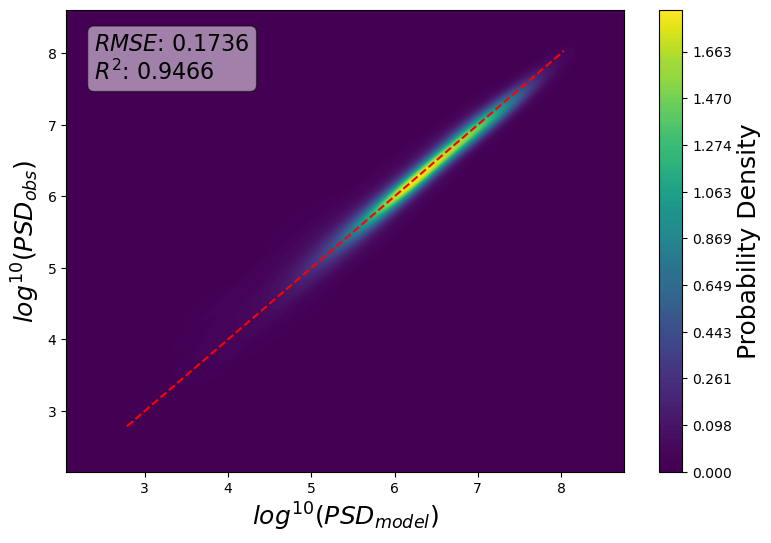

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# 显示负号
plt.rcParams['axes.unicode_minus'] = False


y_pred_scaled = model.predict([X_time_val[:10000], X_non_time_val[:10000]])

# 反缩放预测结果
y_pred = scaler_target.inverse_transform(y_pred_scaled)
y_test_subset = scaler_target.inverse_transform(y_val[:10000])



y_test_exp = y_test_subset.flatten()
y_pred_exp = y_pred.flatten()



# 计算均方根误差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_subset, y_pred)
print(f'测试集上的 RMSE: {rmse}',f'测试集上的 R2: {r2}')




# 创建绘图
plt.figure(figsize=(9, 6))

# 使用 Seaborn 的 kdeplot 绘制联合概率密度图
ax = sns.kdeplot(
    x=y_test_exp, 
    y=y_pred_exp, 
    cmap='viridis', 
    fill=True, 
    thresh=0, 
    levels=100,
    bw_adjust=1.5
)

# 添加理想拟合线
plt.plot(
    [y_test_exp.min(), y_test_exp.max()], 
    [y_test_exp.min(), y_test_exp.max()], 
    'r--', 
    label='理想拟合线'
)

# 提取绘图的颜色集合（PolyCollection）
collections = ax.collections

if collections:
    # 创建颜色条，基于第一个集合（KDE 图）
    cbar = plt.colorbar(collections[0], ax=ax)
    cbar.set_label('Probability Density',fontsize=18)

ax.text(
    0.05, 0.95, 
    f'$RMSE$: {rmse:.4f}\n$R^2$: {r2:.4f}', 
    transform=ax.transAxes,
    fontsize=16,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)
# plt.xlim(-8, -4)
# plt.ylim(-8, -4)
# # 添加图例
# plt.legend()

# 设置坐标轴标签和标题
plt.xlabel('$log^{10}(PSD_{model})$',fontsize=18)
plt.ylabel('$log^{10}(PSD_{obs})$',fontsize=18)
# plt.title('真实值与预测值的概率密度图')

# 显示图形
plt.show()

In [ ]:
np.savetxt('y_test_exp_269.txt',y_test_exp)
np.savetxt('y_pred_exp_269.txt',y_pred_exp)

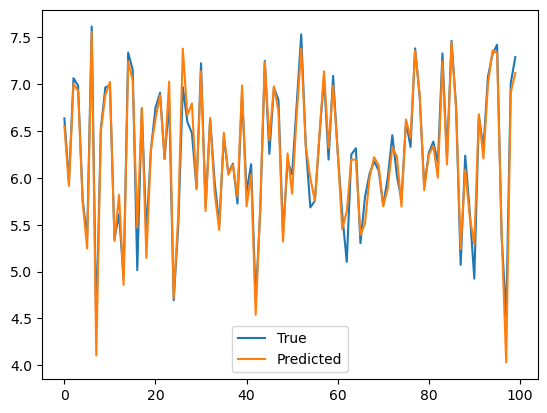

In [ ]:
plt.plot(y_test_exp[:100], label='True')
plt.plot(y_pred_exp[:100], label='Predicted')
plt.legend()